In [7]:
import pandas as pd

In [9]:
dfs = pd.read_html('http://mesowest.utah.edu/cgi-bin/droman/stn_state.cgi?state=UT')

In [11]:
len(dfs)

5

In [13]:
dfs[3].head()

,0,1,2,3,4,5,6,7,8,9
0,Station ID,Station Name,Latitude,Longitude,Elevation,County,Mesonet,First Data Date,Last Data Date,Status
1,40MR,40 MILE RIDGE,37.3836,-111.0326,4700,Kane,GSE,2002-05-06,2011-05-11,INACTIVE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4MIB,FOUR MILE BENCH,37.3437,-111.6784,6160,Kane,GSE,2002-07-01,2011-05-11,INACTIVE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
stn_df = dfs[3]
stn_df.head()

,0,1,2,3,4,5,6,7,8,9
0,Station ID,Station Name,Latitude,Longitude,Elevation,County,Mesonet,First Data Date,Last Data Date,Status
1,40MR,40 MILE RIDGE,37.3836,-111.0326,4700,Kane,GSE,2002-05-06,2011-05-11,INACTIVE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4MIB,FOUR MILE BENCH,37.3437,-111.6784,6160,Kane,GSE,2002-07-01,2011-05-11,INACTIVE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
stn_df.dropna(how='all', inplace=True)

In [18]:
stn_df.rename(columns=stn_df.iloc[0], inplace=True)

In [22]:
stn_df = stn_df.reindex(stn_df.index.drop(0))

In [23]:
stn_df.head()

,Station ID,Station Name,Latitude,Longitude,Elevation,County,Mesonet,First Data Date,Last Data Date,Status
1,40MR,40 MILE RIDGE,37.3836,-111.0326,4700,Kane,GSE,2002-05-06,2011-05-11,INACTIVE
3,4MIB,FOUR MILE BENCH,37.3437,-111.6784,6160,Kane,GSE,2002-07-01,2011-05-11,INACTIVE
5,4UT01,NORTH SALT LAKE BENCH,40.82944,-111.88222,5350,Davis,4UTAH,2000-02-06,2007-07-02,INACTIVE
7,A1050,Escalante National Monument-Visitor,37.77560,-111.61470,5889,Garfield,AIRNOW,2012-07-10,2013-01-16,INACTIVE
9,A1074,Canyonlands NP,38.45830,-109.82110,5954,San Juan,AIRNOW,2012-07-10,2013-01-16,INACTIVE


In [24]:
stn_df.shape

(1933, 10)

In [63]:
active_stn = stn_df[stn_df['Status'] == 'ACTIVE'].copy()

In [64]:
active_stn.dtypes

Station ID         object
Station Name       object
Latitude           object
Longitude          object
Elevation          object
County             object
Mesonet            object
First Data Date    object
Last Data Date     object
Status             object
dtype: object

In [66]:
active_stn['firstdate'] = pd.to_datetime(active_stn['First Data Date'], infer_datetime_format=True, errors='coerce')
active_stn['lastdate'] = pd.to_datetime(active_stn['Last Data Date'], infer_datetime_format=True, errors='coerce')

In [68]:
len(active_stn)

1246

In [69]:
active_stn = active_stn[(active_stn['firstdate'] < '2009-12-31' ) & (active_stn['lastdate'] > '2018-01-01')]

In [70]:
len(active_stn)

474

In [71]:
active_stn.head()

,Station ID,Station Name,Latitude,Longitude,Elevation,County,Mesonet,First Data Date,Last Data Date,Status,firstdate,lastdate
25,ACRU1,AGUA CANYON,37.522222,-112.271111,8890,Kane,RAWS,1997-01-08,2018-01-27,ACTIVE,1997-01-08,2018-01-27
27,AGD,ALTA - GUARD HOUSE,40.5905,-111.638,8799,Salt Lake,AVALANCHE,1998-11-25,2018-01-27,ACTIVE,1998-11-25,2018-01-27
29,AGUU1,AGUA CANYON,37.522170,-112.271180,8889,Kane,SNOTEL,2000-01-20,2018-01-27,ACTIVE,2000-01-20,2018-01-27
33,ALKU1,ALKALI MESA,37.67455,-109.36429,6444,San Juan,SCAN,2008-03-06,2018-01-27,ACTIVE,2008-03-06,2018-01-27
35,ALT,ALTA - TOP OF COLLINS,40.571,-111.631,10443,Salt Lake,AVALANCHE,1997-01-01,2018-01-27,ACTIVE,1997-01-01,2018-01-27


In [1]:
from MesoPy import Meso

In [4]:
m = Meso(token='1f234f93cd3a4529b747f839e51deaee')

In [130]:
data = m.timeseries(start='201001010000', end='201012312300', stid=stn)

In [ ]:
data

In [118]:
from tqdm import tqdm

In [121]:
for year in range(2016, 2018):
    print(year)
    for stn in tqdm(active_stn['Station ID']):
        data = m.timeseries(start='{}01010000'.format(year), end='{}12312300'.format(year), stid=stn)
        obs = data['STATION'][0]['OBSERVATIONS']
        obs_df = pd.DataFrame(obs)
        obs_df.to_pickle('Hourly_Weather/{}_{}.pkl'.format(stn, year))

2016


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [42:18<00:00,  5.36s/it]


2017


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [43:36<00:00,  5.52s/it]


In [122]:
for year in range(2010, 2015):
    print(year)
    for stn in tqdm(active_stn['Station ID']):
        data = m.timeseries(start='{}01010000'.format(year), end='{}12312300'.format(year), stid=stn)
        obs = data['STATION'][0]['OBSERVATIONS']
        obs_df = pd.DataFrame(obs)
        obs_df.to_pickle('Hourly_Weather/{}_{}.pkl'.format(stn, year))

2010


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [36:38<00:00,  4.64s/it]


2011


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [34:05<00:00,  4.32s/it]


2012


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [38:46<00:00,  4.91s/it]


2013


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [40:52<00:00,  5.17s/it]


2014


100%|████████████████████████████████████████████████████████████████████████████████| 474/474 [38:22<00:00,  4.86s/it]


In [123]:
active_stn.to_pickle('HourlyWeatherActiveStations.pkl')

In [125]:
active_stn.to_csv('HourlyWeatherActiveStations.csv')

In [79]:
data1 = m.timeseries(start='201501010000', end='201512312300', stid='ACRU1')

In [105]:
data2 = m.timeseries(start='201501010000', end='201512312300', stid='AGD')

In [80]:
data1

{'QC_SUMMARY': {'PERCENT_OF_TOTAL_OBSERVATIONS_FLAGGED': 0.0,
  'QC_TESTS_APPLIED': ['sl_range_check'],
  'TOTAL_OBSERVATIONS_FLAGGED': 0.0},
 'STATION': [{'DATA_AFFECTED': False,
   'ELEVATION': '8890',
   'ELEV_DEM': '8894',
   'ID': '2322',
   'LATITUDE': ' 37.522222',
   'LONGITUDE': '-112.271111',
   'MNET_ID': '2',
   'NAME': 'AGUA CANYON',
   'OBSERVATIONS': {'air_temp_set_1': [-10.56,
     -10.56,
     -10.56,
     -10.56,
     -11.67,
     -12.22,
     -12.22,
     -12.22,
     -11.67,
     -12.22,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -10.56,
     -10.56,
     -8.33,
     -6.11,
     -4.44,
     -4.44,
     -4.44,
     -8.89,
     -10.0,
     -12.78,
     -11.67,
     -12.78,
     -13.33,
     -13.89,
     -12.22,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -11.67,
     -12.22,
     -11.11,
     -11.67,
     -8.33,
     -5.56,
     -3.89,
     -1.67,
     -1.11,
     -1.67,
     -2.78,
     -4.44,
     -6.

In [81]:
obs = data1['STATION'][0]['OBSERVATIONS']

In [84]:
obs.keys()

dict_keys(['peak_wind_direction_set_1', 'volt_set_1', 'wind_speed_set_1', 'date_time', 'wind_direction_set_1', 'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1', 'wind_chill_set_1d', 'wind_gust_set_1', 'wind_cardinal_direction_set_1d', 'heat_index_set_1d', 'dew_point_temperature_set_1d', 'air_temp_set_1', 'relative_humidity_set_1'])

In [106]:
obs2 = data1['STATION'][0]['OBSERVATIONS']
obs2.keys()

dict_keys(['peak_wind_direction_set_1', 'volt_set_1', 'wind_speed_set_1', 'date_time', 'wind_direction_set_1', 'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1', 'wind_chill_set_1d', 'wind_gust_set_1', 'wind_cardinal_direction_set_1d', 'heat_index_set_1d', 'dew_point_temperature_set_1d', 'air_temp_set_1', 'relative_humidity_set_1'])

In [90]:
364*24

8736

In [88]:
len(obs['peak_wind_direction_set_1'])

8584

In [89]:
len(obs['date_time'])

8584

In [94]:
obs_df = pd.DataFrame(obs)

In [96]:
obs_df['date'] = pd.to_datetime(obs_df['date_time'], infer_datetime_format=True)

In [97]:
obs_df.set_index('date', inplace=True)

In [126]:
obsr14_df = pd.read_pickle('Hourly_Weather/ZNP_2014.pkl')

In [128]:
obsr14_df.head()

,air_temp_set_1,date_time,dew_point_temperature_set_1d,heat_index_set_1d,peak_wind_direction_set_1,peak_wind_speed_set_1,precip_accum_set_1,relative_humidity_set_1,solar_radiation_set_1,volt_set_1,wind_cardinal_direction_set_1d,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
0,-10.56,2015-01-01T00:07:00Z,-12.18,NaN,114.0,7.15,415.036,88.0,11.0,13.7,E,NaN,100.0,7.15,2.23
1,-10.56,2015-01-01T01:07:00Z,-12.18,NaN,67.0,5.37,415.036,88.0,1.0,13.5,ENE,NaN,76.0,5.37,1.79
2,-10.56,2015-01-01T02:07:00Z,-12.18,NaN,93.0,4.92,415.036,88.0,0.0,13.4,E,NaN,79.0,4.92,2.23
3,-10.56,2015-01-01T03:07:00Z,-12.18,NaN,98.0,5.37,415.036,88.0,0.0,13.3,ENE,NaN,61.0,5.37,2.23
4,-11.67,2015-01-01T04:07:00Z,-13.42,NaN,36.0,3.58,415.036,87.0,0.0,13.2,NE,NaN,50.0,3.58,1.34


In [129]:
obsr_df.head()

,air_temp_set_1,date_time,dew_point_temperature_set_1d,heat_index_set_1d,peak_wind_direction_set_1,peak_wind_speed_set_1,precip_accum_set_1,relative_humidity_set_1,solar_radiation_set_1,volt_set_1,wind_cardinal_direction_set_1d,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
0,-10.56,2015-01-01T00:07:00Z,-12.18,NaN,114.0,7.15,415.036,88.0,11.0,13.7,E,NaN,100.0,7.15,2.23
1,-10.56,2015-01-01T01:07:00Z,-12.18,NaN,67.0,5.37,415.036,88.0,1.0,13.5,ENE,NaN,76.0,5.37,1.79
2,-10.56,2015-01-01T02:07:00Z,-12.18,NaN,93.0,4.92,415.036,88.0,0.0,13.4,E,NaN,79.0,4.92,2.23
3,-10.56,2015-01-01T03:07:00Z,-12.18,NaN,98.0,5.37,415.036,88.0,0.0,13.3,ENE,NaN,61.0,5.37,2.23
4,-11.67,2015-01-01T04:07:00Z,-13.42,NaN,36.0,3.58,415.036,87.0,0.0,13.2,NE,NaN,50.0,3.58,1.34


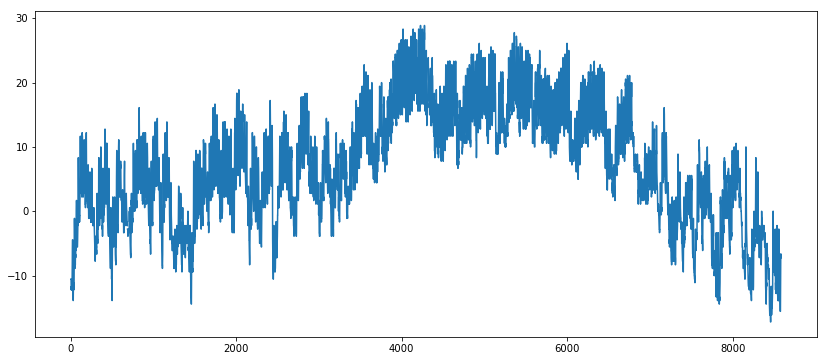

In [127]:
obsr14_df['air_temp_set_1'].plot(figsize=(14,6))

In [107]:
obs_df.to_pickle('Hourly_Weather/stn.pkl')

In [113]:
obsr_df = pd.read_pickle('Hourly_Weather/ZNP_2015.pkl')

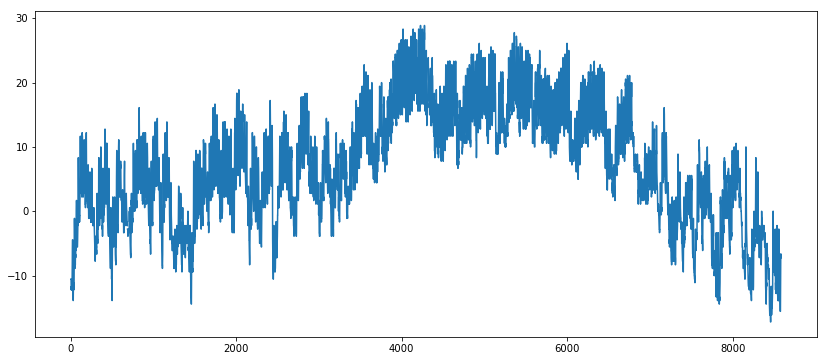

In [114]:
obsr_df['air_temp_set_1'].plot(figsize=(14,6))

In [99]:
%matplotlib inline

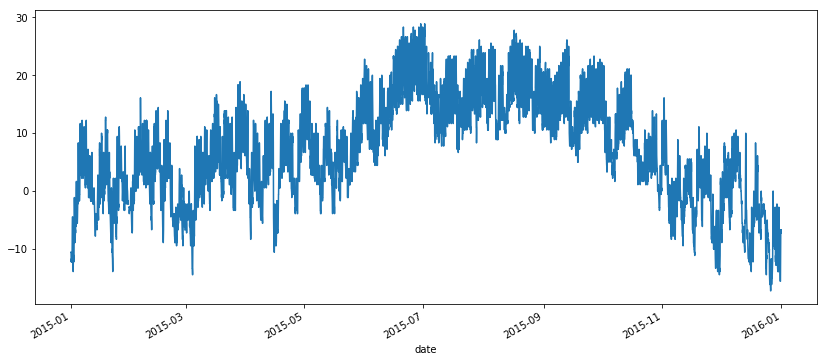

In [102]:
obs_df['air_temp_set_1'].plot(figsize=(14,6))

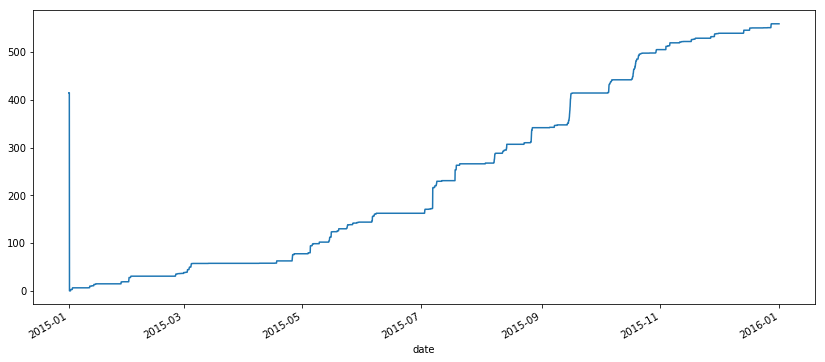

In [103]:
obs_df.precip_accum_set_1.plot(figsize=(14,6))

In [104]:
obs_df.columns

Index(['air_temp_set_1', 'date_time', 'dew_point_temperature_set_1d',
       'heat_index_set_1d', 'peak_wind_direction_set_1',
       'peak_wind_speed_set_1', 'precip_accum_set_1',
       'relative_humidity_set_1', 'solar_radiation_set_1', 'volt_set_1',
       'wind_cardinal_direction_set_1d', 'wind_chill_set_1d',
       'wind_direction_set_1', 'wind_gust_set_1', 'wind_speed_set_1'],
      dtype='object')

In [72]:
precip = m.precip(stid='ACRU1', start='201504261800', end='201504271200', units='precip|in')

In [73]:
precip

{'STATION': [{'ELEVATION': '8890',
   'ELEV_DEM': '8894',
   'ID': '2322',
   'LATITUDE': ' 37.522222',
   'LONGITUDE': '-112.271111',
   'MNET_ID': '2',
   'NAME': 'AGUA CANYON',
   'OBSERVATIONS': {'count_1': 20,
    'ob_end_time_1': '2015-04-27T12:07:00Z',
    'ob_start_time_1': '2015-04-26T17:07:00Z',
    'total_precip_value_1': 0.07,
    'vids_case0': ['20']},
   'PERIOD_OF_RECORD': {'end': '2018-01-25T20:07:00Z',
    'start': '1997-01-08T00:00:00Z'},
   'RESTRICTED': False,
   'STATE': 'UT',
   'STATUS': 'ACTIVE',
   'STID': 'ACRU1',
   'TIMEZONE': 'America/Denver'}],
 'SUMMARY': {'DATA_PARSE_TIME': 0.3790855408,
  'DATA_QUERY_TIME': 5.087852478,
  'MD_QUERY_TIME': 30.9550762177,
  'METADATA_RESPONSE_TIME': '0.0741481781006 ms',
  'NUMBER_OF_OBJECTS': 1,
  'PRECIP_DATA_TIME': 36.5979671478,
  'RESPONSE_CODE': 1,
  'RESPONSE_MESSAGE': 'OK'}}